In [2]:
# считываю названия документов
import os  
directory = 'blogs' 
files = os.listdir(directory)

In [3]:
# files

In [4]:
# считываю текс документов
summ, positive, negative = 0, 0, 0
text = []
for name in files:
    try:
        document = open('blogs/'+name)
        my_text = document.read()
        text.append(my_text) 
        document.close()
        positive += 1
    except:
        negative += 1

print('не открылось', 100*negative/(positive + negative), 'процента файлов')

не открылось 8.29192546583851 процента файлов


In [5]:
# подготавливаю слова для обучения
from string import punctuation
words = [[word.lower() for word in sent.split(' ') if word not in punctuation and word.isalpha()] 
                                            for sent in text]

In [6]:
# words

In [7]:
from gensim.models import Word2Vec
w2v = Word2Vec(words, min_count=2, size=2, iter=10)

#  

C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__()

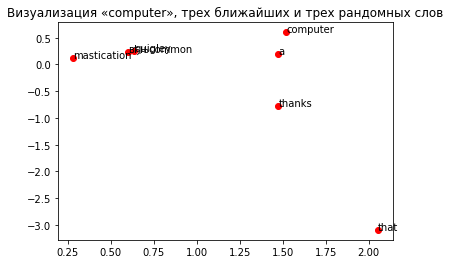

In [29]:
# визуализация слов
import matplotlib.pyplot as plt
import random
my_word = 'computer'
near_word = w2v.most_similar([my_word])
point = [w2v[my_word]]
for k in range(3):
    try:
        plt.annotate(near_word[k][0], xy=w2v[near_word[k][0]])
        i = random.randint(0, positive - 1)
        j = random.randint(0, len(words[i]) - 1)
        plt.annotate(words[i][j], xy=w2v[words[i][j]])
        point.append(w2v[near_word[k][0]])
        point.append(w2v[words[i][j]])
    except:
        None
plt.annotate(my_word, xy=w2v[my_word])
plt.plot(*zip(*point), marker='o', color='r', ls='')
plt.title('Визуализация «'+my_word+'», трех ближайших и трех рандомных слов');

C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


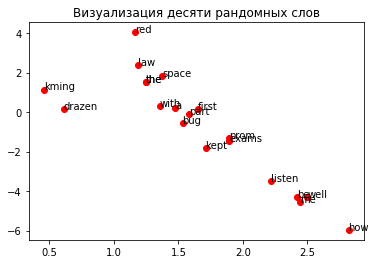

In [9]:
point = []
for k in range(20):
    i = random.randint(0, positive - 1)
    j = random.randint(0, len(words[i]) - 1)
    plt.annotate(words[i][j], xy=w2v[words[i][j]])
    point.append(w2v[words[i][j]])
plt.plot(*zip(*point), marker='o', color='r', ls='')
plt.title('Визуализация десяти рандомных слов');

#  

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tf_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(" "), strip_accents=None,
                                              min_df=0.005, ngram_range=(1,1), max_df=1000)
dtm_tf = tf_vectorizer.fit_transform(text)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(text)

C:\Users\XXX\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


In [11]:
# долго
from sklearn.decomposition import LatentDirichletAllocation


lda_tfidf = LatentDirichletAllocation(n_components=4, max_iter=300, n_jobs=16,
                                    evaluate_every=10, random_state=12)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=10, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=300,
                          mean_change_tol=0.001, n_components=4, n_jobs=16,
                          perp_tol=0.1, random_state=12, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [12]:
# топ слова по темам
import pandas as pd
def get_top_words_by_topics(model, feature_names, n_top_words):
    d = {}
    for topic_idx, topic in enumerate(model.components_):
        d[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return d

word = tfidf_vectorizer.get_feature_names()

topic_actions = get_top_words_by_topics(lda_tfidf, word, 10)

actions = pd.DataFrame(topic_actions)
actions.columns=["topic_{}".format(i) for i in range(4)]
actions = actions.T
actions.columns = ['action_name_{}'.format(i) for i in range(10)]
actions

,action_name_0,action_name_1,action_name_2,action_name_3,action_name_4,action_name_5,action_name_6,action_name_7,action_name_8,action_name_9
topic_0,w/,b/c,вђ“,didnвђ™t,>,\n\n\n\n,:-),iвђ™ve,josh,:d
topic_1,den,coz,juz,wif,tat,abt,tt,cos,mi,jus
topic_2,na,sa,ko,ng,ang,ako,lang,naman,mga,pa
topic_3,much!!!,kirsten,ow,crutches,trent,elle,thompson,lizzie,lama,hobo


In [13]:
# топ слова по темам
for i in range(4):
    print("################Topic_{}##################".format(i))
    print("\n".join(actions.iloc[i].values))

################Topic_0##################
w/
b/c
вђ“
didnвђ™t
>





:-)
iвђ™ve
josh
:d
################Topic_1##################
den
coz
juz
wif
tat
abt
tt
cos
mi
jus
################Topic_2##################
na
sa
ko
ng
ang
ako
lang
naman
mga
pa
################Topic_3##################
much!!!
kirsten
ow
crutches
trent
elle
thompson
lizzie
lama
hobo


#   

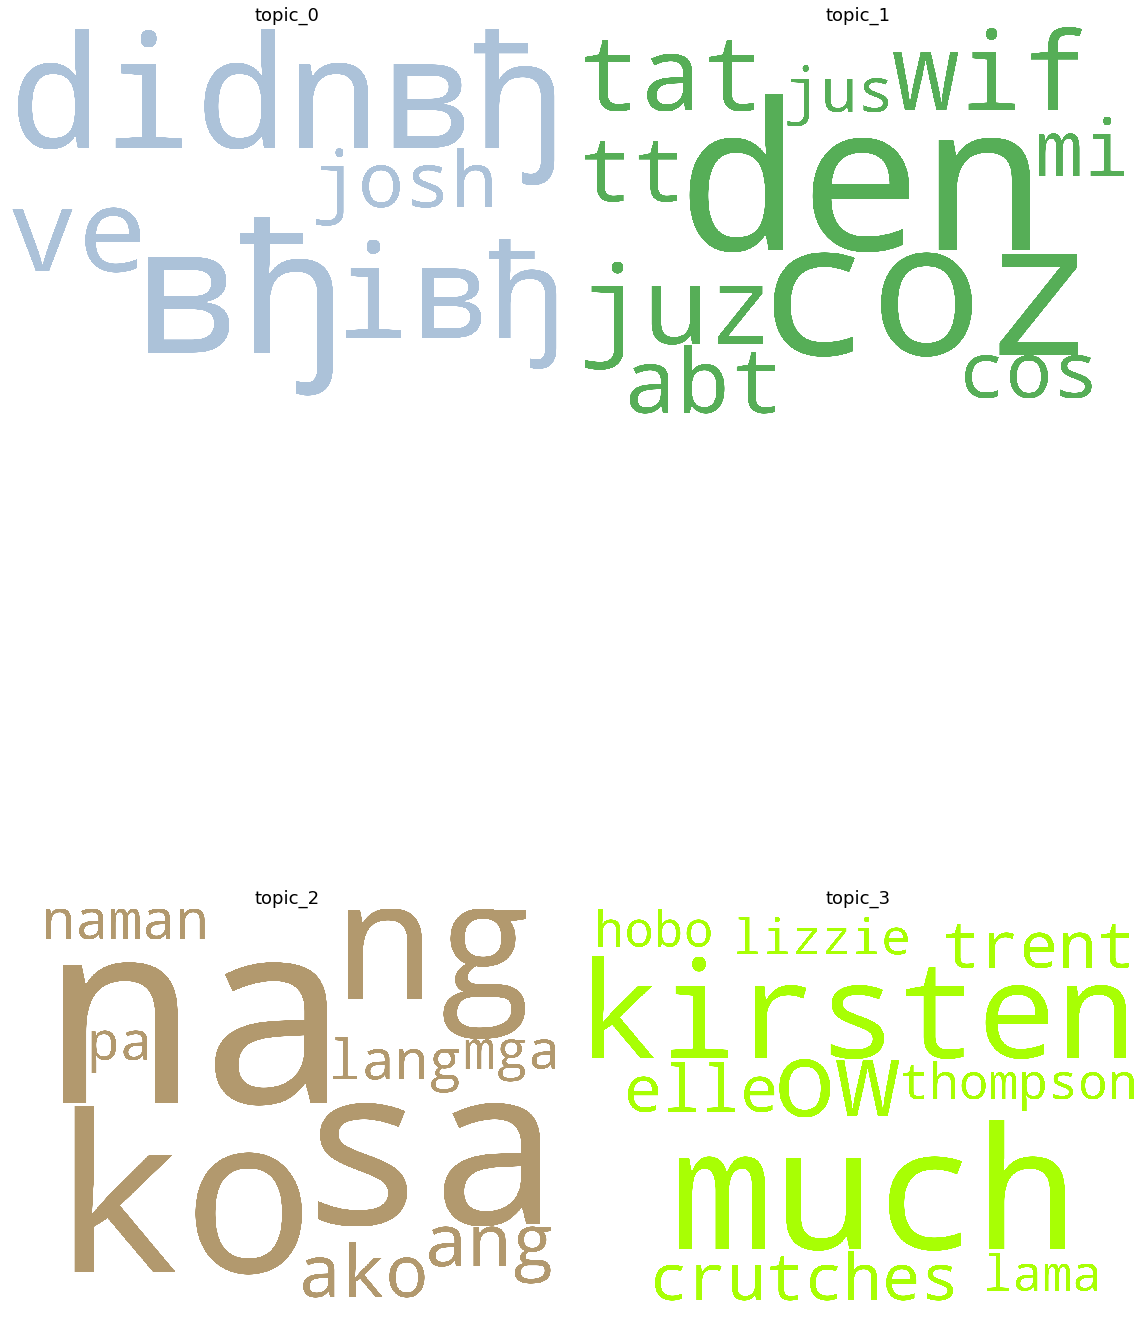

In [14]:
# визуализация облаков слов
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()] 

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


fig, axes = plt.subplots(2, 2, figsize=(16,32), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    try:
        fig.add_subplot(ax)
        topic_words = ' '.join(actions.iloc[i].values)
        cloud.generate(topic_words)
        plt.gca().imshow(cloud)
        plt.gca().set_title('topic_' + str(i), fontdict=dict(size=18))
        plt.gca().axis('off')
    except:
        None
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

#   

In [15]:
from nltk.corpus import stopwords
cv = CountVectorizer(stop_words=stopwords.words('english')) 
tdata = cv.fit_transform(text) 
ft = cv.get_feature_names()

In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(tdata)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': ft, 'weight': weights})

In [17]:
# TF-IDF(важные слова)
weights_df.sort_values(by='weight', ascending=False).head(10)

,term,weight
407077,post,0.139633
138576,date,0.134359
356730,nbsp,0.091165
7882,2004,0.064904
304883,like,0.055275
543166,urllink,0.048225
374751,one,0.044410
212252,get,0.041659
289375,know,0.039407
519480,time,0.038095


C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


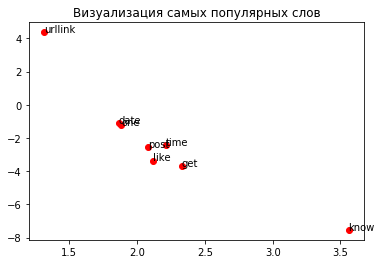

In [18]:
# их визуализация
point = []
popular = weights_df.sort_values(by='weight', ascending=False).head(10)
for i in popular['term']:
    try:
        plt.annotate(i, xy=w2v[i])
        point.append(w2v[i])
    except:
        None
    
plt.plot(*zip(*point), marker='o', color='r', ls='')
plt.title('Визуализация самых популярных слов');

In [19]:
# вектор слова 'post'
print(w2v['post'])

[ 2.0791738 -2.5378413]


C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [20]:
# близкие к 'post' слова
w2v.most_similar(['post'])

C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('hotplates', 1.0),
 ('missed', 1.0),
 ('shyt', 1.0),
 ('nothingto', 1.0),
 ('darlingx', 1.0),
 ('runnerguy', 1.0),
 ('backsreet', 1.0),
 ('overwhlemed', 1.0),
 ('somfin', 1.0),
 ('conans', 1.0)]

C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated

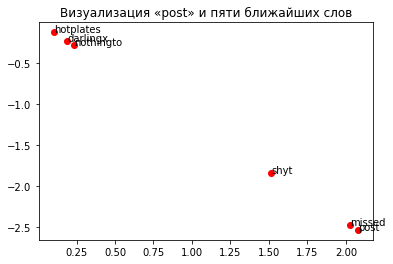

In [21]:
# Визуализация 'post' и пяти ближайших слов
my_word = 'post'
near_word = w2v.most_similar([my_word])
point = [w2v[my_word]]
for k in range(5):
    plt.annotate(near_word[k][0], xy=w2v[near_word[k][0]])
    point.append(w2v[near_word[k][0]])
plt.annotate(my_word, xy=w2v[my_word])
plt.plot(*zip(*point), marker='o', color='r', ls='')
plt.title('Визуализация «'+my_word+'» и пяти ближайших слов');

In [22]:
# TF-IDF(не важные слова)
weights_df.sort_values(by='weight', ascending=True).head(10)

,term,weight
80666,bnch,9.805694e-09
41854,anaus,9.805694e-09
336117,millenniumrestaurant,9.805694e-09
227785,hahahaahahhahahahahahahahhahahahaha,9.805694e-09
421692,quotesheet,9.805694e-09
131590,crrrrraaaaannnnkkkkkkkyyyyyyy,9.805694e-09
272766,jhaahaha,9.805694e-09
577990,yiummy,9.805694e-09
325783,maxijill,9.805694e-09
340226,mnsqft,9.805694e-09


#   

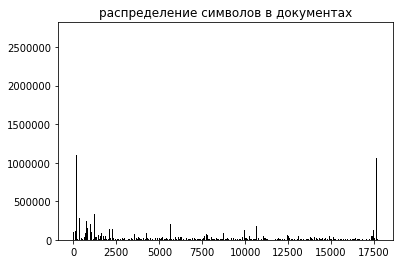

In [23]:
# распределение символов в документах
number = []
for k in range(len(text)):
    number.append(len(text[k]))

x = range(len(number))
ax = plt.gca()
ax.bar(x, number, align='edge', color='black')
plt.title('распределение символов в документах')        
plt.show()

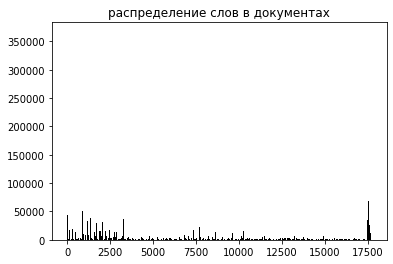

In [24]:
# распределение слов в документах
numbers = []
for i in range(len(words)):
    numbers.append(len(words[i]))

x = range(len(numbers))
ax = plt.gca()
ax.bar(x, numbers, align='edge', color='black')
plt.title('распределение слов в документах')        
plt.show()